In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("F:\SACHIN\Study\Projects\ML_Data\logistic-regression\\ex2data1.csv")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 3 columns):
34.62365962451697    99 non-null float64
78.0246928153624     99 non-null float64
0                    99 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.4 KB


In [3]:
df.columns = ['x1', 'x2', 'y']
df.head()

,x1,x2,y
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


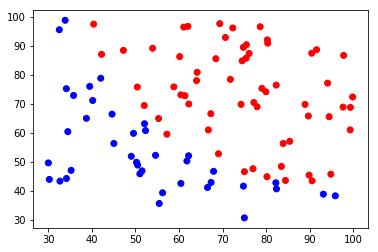

In [4]:
col = np.where(df['y'] == 1, 'r', 'b')
plt.scatter(df['x1'],df['x2'], c = col)
plt.show()

In [5]:
def sigmoid(z):
    return (1 / (1 + np.exp(-z)))

In [6]:
X = np.array(df.drop(['y'], 1))
y = np.array(df['y'], ndmin=2)
[m,n] = X.shape
initial_theta = np.zeros((n+1, 1))
X = np.insert(X, 0, np.ones(m), 1)


In [7]:
def cost_function(theta, X, y):
    m = X.shape[0]
    J = 0
    grad = np.zeros(len(theta))
    h_theta_of_x = sigmoid(X @ theta)
    
    J = (1 / m) * np.sum((-y.transpose() @ np.log(h_theta_of_x)) - (1 - y).transpose() @ (np.log(1 - h_theta_of_x)))
    
    temp1 = np.subtract(h_theta_of_x, y)
    grad = (1/m) * X.transpose() @ temp1
    
    return J, grad

In [8]:
cost, grad = cost_function(initial_theta, X, y.transpose())
print(cost)
print('--------')
print(grad)

0.69314718056
--------
[[ -0.10606061]
 [-12.30538878]
 [-11.77067239]]


In [9]:
test_theta = np.array([-24, 0.2, 0.2], ndmin=2)
print(1, test_theta.shape)
print(2, X.shape)
print(3, y.shape)
cost, grad = cost_function(test_theta.transpose(), X, y.transpose())
print(cost)
print('--------')
print(grad)

1 (1, 3)
2 (99, 3)
3 (1, 99)
0.21844573119
--------
[[ 0.04144856]
 [ 2.52679301]
 [ 2.52623742]]
